In [34]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape #1460 records, 81 columns

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isnull().sum()  # many missing values, lot front has 259 missing values ...more

# drop the ones having a large no. of missing values (alley, poolqc, fence....)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

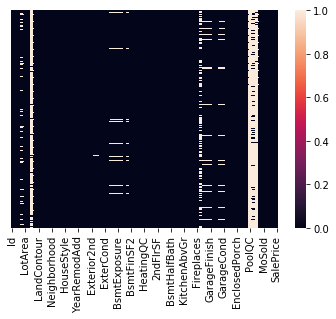

In [8]:
sn.heatmap(df.isnull(), yticklabels=False)
#lots of missing values (alley, poolqc...)

In [9]:
# fill missing vals

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [10]:
# drop some attributes

df.drop(['Alley'],axis=1,inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)

In [11]:
df.shape

(1460, 75)

In [12]:
# any more null vals?
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

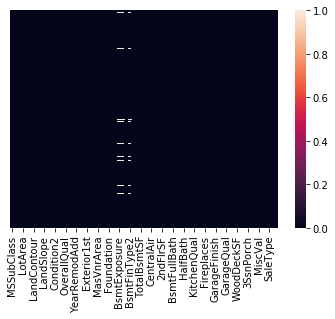

In [13]:
sn.heatmap(df.isnull(),yticklabels=False)
# less gaps in the heatmap, less missing values

In [14]:
# BsmtFinType2 has some missing vals, fill with mode
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

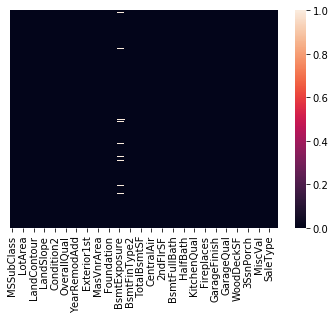

In [15]:
#BsmtFinType2 is filled up, less gaps
sn.heatmap(df.isnull(),yticklabels=False)

In [16]:
# drop the rest:
df.dropna(inplace=True)

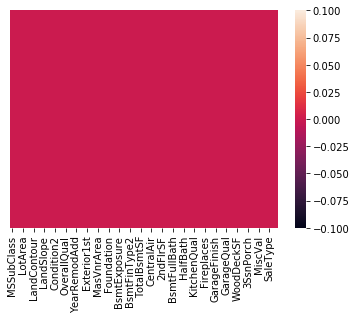

In [17]:
sn.heatmap(df.isnull(),yticklabels=False)

In [18]:
df.shape # one droppped

(1421, 75)

In [19]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
# Caterogical vals => numeric values
# A seperate dataframe only for categorical values

df_cat = df.select_dtypes(include='object').copy()
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
df_cat['MSZoning'].unique() # 5 unique categories,  This method will list down any missing values (nan) as well

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [23]:
df_cat['MSZoning'].nunique() #Count of distinct categories in our variable but this time we don't want to count any nan values

5

In [25]:
df_cat_encoded = pd.get_dummies(df_cat, columns=['MSZoning'])
df_cat_encoded.head()
# one column => 5 columns

,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,0,0,0,1,0
1,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,TA,Y,WD,Normal,0,0,0,1,0
2,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,0,0,0,1,0
3,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,TA,TA,Y,WD,Abnorml,0,0,0,1,0
4,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,0,0,0,1,0


In [28]:
# apply this to the main dataframe (39 columns).
# convert categorical data using one-hot encoding.

def convert_categorical(category, df):
    s = str(category)
    df = pd.get_dummies(df, columns=[s])
    return df

df_encoded = convert_categorical('Street', df)
df_encoded = convert_categorical('MSZoning', df_encoded)
df_encoded = convert_categorical('LotShape', df_encoded)
df_encoded = convert_categorical('LandContour', df_encoded)
df_encoded = convert_categorical('Utilities', df_encoded)
df_encoded = convert_categorical('LotConfig', df_encoded)
df_encoded = convert_categorical('LandSlope', df_encoded)
df_encoded = convert_categorical('Neighborhood', df_encoded)
df_encoded = convert_categorical('Condition1', df_encoded)
df_encoded = convert_categorical('Condition2', df_encoded)
df_encoded = convert_categorical('BldgType', df_encoded)
df_encoded = convert_categorical('HouseStyle', df_encoded)
df_encoded = convert_categorical('RoofStyle', df_encoded)
df_encoded = convert_categorical('RoofMatl', df_encoded)
df_encoded = convert_categorical('Exterior1st', df_encoded)
df_encoded = convert_categorical('Exterior2nd', df_encoded)
df_encoded = convert_categorical('MasVnrType', df_encoded)
df_encoded = convert_categorical('ExterQual', df_encoded)
df_encoded = convert_categorical('ExterCond', df_encoded)
df_encoded = convert_categorical('Foundation', df_encoded)
df_encoded = convert_categorical('BsmtQual', df_encoded)
df_encoded = convert_categorical('BsmtCond', df_encoded)
df_encoded = convert_categorical('BsmtExposure', df_encoded)
df_encoded = convert_categorical('BsmtFinType1', df_encoded)
df_encoded = convert_categorical('BsmtFinType2', df_encoded)
df_encoded = convert_categorical('Heating', df_encoded)
df_encoded = convert_categorical('HeatingQC', df_encoded)
df_encoded = convert_categorical('CentralAir', df_encoded)
df_encoded = convert_categorical('Electrical', df_encoded)
df_encoded = convert_categorical('KitchenQual', df_encoded)
df_encoded = convert_categorical('Functional', df_encoded)
df_encoded = convert_categorical('FireplaceQu', df_encoded)
df_encoded = convert_categorical('GarageType', df_encoded)
df_encoded = convert_categorical('GarageFinish', df_encoded)
df_encoded = convert_categorical('GarageQual', df_encoded)
df_encoded = convert_categorical('GarageCond', df_encoded)
df_encoded = convert_categorical('PavedDrive', df_encoded)
df_encoded = convert_categorical('SaleType', df_encoded)
df_encoded = convert_categorical('SaleCondition', df_encoded)


df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(235)
memory usage: 736.9 KB


In [30]:
# now, conv all to float
df_encoded = df_encoded.astype(float)
df_encoded.info() # all float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(271)
memory usage: 2.9 MB


In [31]:
df_encoded.isnull().values.any() # no null values, all dtype = float

False

# To Do:
1. ~~Fill missing values with mean values.~~
2. ~~Drop the features with a large number of missing values.~~
3. Scale all float values.
4. Split training data.
5. Define NN.
6. Train.
7. Visualise train-loss and val-loss.